<a href="https://colab.research.google.com/github/AimoneCG/Proyecto-Coderhouse-Data-Science-III-/blob/main/AimoneCG_CoderHouse_Proyecto_Data_Science_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Entrega Final** -  Cristian Aimone
# Data Science III
# Comisión 61715
### Fecha: 22/05/2025



# **Abstracto y audiencia**
- El dataset elegido contiene datos de las revisiones de usuarios de varias aerolineas de todo el mundo
- Ademas de la puntuacipon en diversas categorias, también contiene una reseña escrita en formato de texto para poder analizar

# Audiencia
- La audiencia de este análisis son aquellos que se puedan ver benefiados por el conocimiento de cuales son las aerolineas que brindan un mejor servicio o que reciben una mejor calificación, entre los que se pueden encontrar:
  - Aerolineas o sus departamentos de marketing
  - agencias de viajes
  - consultores de negocios
  - viajeros

# **Contexto Comercial**

Este análisis de reseñas de aerolíneas puede llegar a tener un profundo impacto en diversas áreas comerciales. Por ejemplo puede ser utilizado para:

1.  **Mejorar la Experiencia del Cliente y Optimización Operacional para Aerolíneas:**
    *   **Identificar los Puntos Débiles y Fuertes:** El análisis de texto de las reseñas puede revelar patrones y temas recurrentes en las quejas y elogios de los clientes. Esto permite a las aerolíneas identificar áreas específicas de mejora (por ejemplo, servicio al cliente, comodidad de los asientos, puntualidad, calidad de la comida, procesos de embarque/desembarque).
    *   **Priorización de Inversiones:** Al comprender qué aspectos de la experiencia del cliente son más valorados o critican, las aerolíneas pueden asignar recursos de manera más efectiva para mejorar la satisfacción del cliente.
    *   **Optimización de la Tripulación y el Personal:** Las menciones sobre la interacción con el personal pueden ayudar a identificar necesidades de capacitación o reconocer a miembros del personal que brindan un servicio excepcional.
    *   **Análisis Competitivo:** Comparar las reseñas de una aerolínea con las de la competencia permite identificar las áreas donde se destacan o se quedan atrás.

2.  **Estrategias de Marketing y Comunicación para Aerolíneas:**
    *   **Identificar Proposiciones de Valor Únicas:** El análisis puede resaltar los aspectos positivos que son más mencionados por los clientes satisfechos, lo que ayuda a definir mensajes de marketing efectivos.
    *   **Gestión de la Reputación Online:** Monitorear las reseñas permite a las aerolíneas responder a comentarios negativos y positivos, gestionando activamente su imagen online.
    *   **Creación de Contenido Dirigido:** Utilizar los temas recurrentes en las reseñas para crear contenido de marketing que aborde las preocupaciones o resalte los puntos fuertes.

3.  **Optimización de la Oferta de Agencias de Viajes y Plataformas de Reserva:**
    *   **Recomendaciones Personalizadas:** Las agencias y plataformas pueden utilizar los insights de las reseñas para ofrecer recomendaciones de aerolíneas más personalizadas a sus clientes, basándose en las preferencias y prioridades expresadas en las reseñas (por ejemplo, si un cliente valora la comodidad, se pueden recomendar aerolíneas con asientos mejor calificados).
    *   **Negociación con Aerolíneas:** Conocer la satisfacción general de los clientes con diferentes aerolíneas puede fortalecer la posición negociadora de las agencias con los proveedores de servicios aéreos.
    *   **Contenido Informativo:** Utilizar los resultados del análisis para crear contenido informativo en sus plataformas, ayudando a los viajeros a tomar decisiones informadas.

4.  **Herramientas de Consultoría y Benchmarking para Consultores de Negocios:**
    *   **Análisis Comparativo de la Industria:** Los consultores pueden utilizar el dataset para realizar análisis comparativos del rendimiento y la satisfacción del cliente de diferentes aerolíneas, identificando las mejores prácticas y las áreas donde las aerolíneas se están quedando atrás.
    *   **Asesoramiento Estratégico:** Proporcionar asesoramiento a las aerolíneas sobre cómo mejorar su servicio al cliente, operaciones y estrategias de marketing basándose en los insights de las reseñas.
    *   **Evaluación de la Experiencia del Cliente:** Ayudar a las empresas a medir y evaluar la experiencia del cliente en el sector de las aerolíneas.

5.  **Ayudar en la Toma de Decisiones a Viajeros:**
    *   **Comparación de Servicios:** Los viajeros pueden utilizar los resultados del análisis para comparar diferentes aerolíneas en función de las experiencias de otros usuarios, no solo en términos de precio sino también en aspectos como el servicio, la comodidad y la puntualidad.
    *   **Expectativas Realistas:** Leer reseñas detalladas puede ayudar a los viajeros a establecer expectativas más realistas sobre su experiencia de vuelo.
    *   **Planificación de Viajes:** Utilizar los insights de las reseñas para tomar decisiones sobre qué aerolíneas elegir para rutas específicas o tipos de viaje.

En resumen, podemos decir que el análisis del dataset de reseñas de aerolíneas no es solo un ejercicio académico, sinoque también puede ser una herramienta poderosa para la toma de decisiones estratégicas y operacionales en un sector altamente competitivo. La información extraída puede ser utilizada por múltiples actores para mejorar la experiencia del cliente, optimizar las operaciones, refinar las estrategias de marketing y, en última instancia, aumentar la rentabilidad y la satisfacción del cliente.


# **Objetivo del Trabajo**

Este trabajo intenta demostrar cómo con la combinación de EDA, análisis de texto y modelado predictivo se puede extraer inteligencia de datos no estructurados como las reseñas de clientes.

Los hallazgos pueden ser utilizados por las aerolíneas para enfocar sus esfuerzos de mejora en las áreas de mayor impacto, gestionar su reputación online respondiendo activamente al feedback, y para los viajeros, para tomar decisiones más informadas al elegir una aerolínea basándose no solo en el precio, sino también en la experiencia percibida por otros usuarios.

In [51]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import missingno as msno

# Setting up visualization styles
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Text processing
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    print("VADER lexicon not found. Downloading...")
    nltk.download('vader_lexicon')
    print("VADER lexicon downloaded.")

# Download NLTK data files
nltk.download('punkt')  # Tokenizers
nltk.download('stopwords')  # Stop words
nltk.download('wordnet')  # WordNet lemmatizer
nltk.download('punkt_tab') # Download punkt_tab for word_tokenize when preserve_line=False


# Utility libraries
from collections import Counter

# Modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Lectura del dataset

- Origen de los datos: https://github.com/Juhibhojani/Airline-Reviews-
- Configuramos el notebook para leer el dataset desde mi Github personal

In [52]:
url = "https://raw.githubusercontent.com/AimoneCG/Proyecto-Coderhouse-Data-Science-III-/main/Airline_review.csv"

df = pd.read_csv(url)

# Imprimimos el encabezado para conocer un poco los datos
print("Vamos a ver el encabezado del dataset:")
df.head()


Vamos a ver el encabezado del dataset:


,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


### **Diccionario de variables:**

- Airline Name: Nombre de la aerolinea
- Overall Rating = La calificación general dada por el cliente.
- Review Title = título de la reseña del cliente.
- Review Date = Fecha en la que se realizó la calificación
- Verified (Indica si la reseña está verificada o no.)
- Review = Comentario del pasajero
- Aircraft = Modelo de Aeronave del viaje
- Type of Traveller = El tipo de pasajero (por ejemplo, Negocios, Ocio)
- Seat Type = Categoría o tipo de asiento (por ejemplo, Negocios, Económica)
- Route = La ruta de vuelo tomada por el cliente
- Date Flown = La fecha en que se realizó el vuelo.
- Seat Comfort = Calificación de la comodidad del asiento.
- Cabin Staff Service = Calificación del servicio del personal de cabina.
- Food & Beverages = Calificación de la comida y bebidas.
- Ground Service = Calificación del servicio en tierra.
- Inflight Entertainment = Calificación del entretenimiento a bordo.
- Wifi & Connectivity= Calificación del wifi y la conectividad a bordo.
- Value for Money = Calificación de la relación calidad-precio.
- Recommended = Si el cliente recomienda la aerolinea

This dataset holds a wealth of information that can be leveraged to gain valuable insights into customer experiences with various airlines. By performing sentiment analysis, time series analysis, and prediction tasks, we can uncover hidden patterns, understand passenger sentiments, and make data-driven decisions to enhance the overall airline experience. Let's make the most of this dataset and embark on an exciting

# **EDA - Análisis Exploratorio de Datos**

## Análisis Inicial del dataset

In [53]:
df.shape

(23171, 20)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [55]:
print(" Cantidad de Nulos ")
print(df.isnull().sum())

 Cantidad de Nulos 
Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64


In [56]:
print(" DESCRIBE: OBJECT ")
print(df.describe(include="O").T)

 DESCRIBE: OBJECT 
                   count unique  \
Airline Name       23171    497   
Overall_Rating     23171     10   
Review_Title       23171  17219   
Review Date        23171   4557   
Review             23171  23046   
Aircraft            7129   1048   
Type Of Traveller  19433      4   
Seat Type          22075      4   
Route              19343  13607   
Date Flown         19417    109   
Recommended        23171      2   

                                                                 top   freq  
Airline Name                                         Aegean Airlines    100  
Overall_Rating                                                     1  11595  
Review_Title                                Onur Air customer review     84  
Review Date                                           16th July 2023     67  
Review             I flew Lan Peru on a domestic flight from Lima...      2  
Aircraft                                                        A320   1041  
Type Of Travel

In [57]:
print(" DESCRIBE: NUMERIC ")
print(df.describe().T)

 DESCRIBE: NUMERIC 
                          count          mean          std  min     25%  \
Unnamed: 0              23171.0  11585.000000  6689.035880  0.0  5792.5   
Seat Comfort            19016.0      2.618374     1.464840  0.0     1.0   
Cabin Staff Service     18911.0      2.871609     1.604631  0.0     1.0   
Food & Beverages        14500.0      2.553586     1.526314  0.0     1.0   
Ground Service          18378.0      2.353738     1.595747  1.0     1.0   
Inflight Entertainment  10829.0      2.179056     1.488839  0.0     1.0   
Wifi & Connectivity      5920.0      1.780405     1.318800  0.0     1.0   
Value For Money         22105.0      2.451165     1.594155  0.0     1.0   

                            50%      75%      max  
Unnamed: 0              11585.0  17377.5  23170.0  
Seat Comfort                3.0      4.0      5.0  
Cabin Staff Service         3.0      4.0      5.0  
Food & Beverages            2.0      4.0      5.0  
Ground Service              1.0      4.0    

# **Data Wranglimg - Limpieza y transformación de datos**

In [58]:
# Acomodamos los nombres de las columnas
df.columns = [col.replace(" ", "_") for col in df.columns]

# Borramos las columnas que parecen no tener relevancia en este análisis
df.drop(["Unnamed:_0","Aircraft","Route","Date_Flown"], axis=1, inplace=True)


In [59]:
# Verificamos los nombres de las columnas del dataset despues del cambio

print(" Nombres de las columnas después del cambio:")
print(df.columns)

 Nombres de las columnas después del cambio:
Index(['Airline_Name', 'Overall_Rating', 'Review_Title', 'Review_Date',
       'Verified', 'Review', 'Type_Of_Traveller', 'Seat_Type', 'Seat_Comfort',
       'Cabin_Staff_Service', 'Food_&_Beverages', 'Ground_Service',
       'Inflight_Entertainment', 'Wifi_&_Connectivity', 'Value_For_Money',
       'Recommended'],
      dtype='object')


In [60]:
# Revisamos los datos de la columna objetivo 'Overall_Rating'
df['Overall_Rating'].unique()

array(['9', '1', '8', '2', '3', '5', '6', '7', '4', 'n'], dtype=object)

In [61]:
# Cambiamos el valor "n" por 10
df['Overall_Rating']=df['Overall_Rating'].replace('n',10).astype(int)

In [62]:
# Cambiamos el tipo de la columna Overall_Rating de Object a float64

df['Overall_Rating'] = df['Overall_Rating'].astype('float64')

print("\nTipo de dato de la columna 'Overall_Rating' después del cambio:")
print(df['Overall_Rating'].dtype)


Tipo de dato de la columna 'Overall_Rating' después del cambio:
float64


In [63]:
# Verificamos el cambio corriendo nuevamente Describe para los valores númericos
print(" DESCRIBE: NUMERIC ")
print(df.describe().T)

 DESCRIBE: NUMERIC 
                          count      mean       std  min  25%  50%  75%   max
Overall_Rating          23171.0  3.393466  3.104160  1.0  1.0  1.0  6.0  10.0
Seat_Comfort            19016.0  2.618374  1.464840  0.0  1.0  3.0  4.0   5.0
Cabin_Staff_Service     18911.0  2.871609  1.604631  0.0  1.0  3.0  4.0   5.0
Food_&_Beverages        14500.0  2.553586  1.526314  0.0  1.0  2.0  4.0   5.0
Ground_Service          18378.0  2.353738  1.595747  1.0  1.0  1.0  4.0   5.0
Inflight_Entertainment  10829.0  2.179056  1.488839  0.0  1.0  2.0  3.0   5.0
Wifi_&_Connectivity      5920.0  1.780405  1.318800  0.0  1.0  1.0  2.0   5.0
Value_For_Money         22105.0  2.451165  1.594155  0.0  1.0  2.0  4.0   5.0


In [64]:
# Pasamos los valores de la columna 'Recommended' a booleano, donde yes es 1 y no es 0
# esto puede ser usado como varialble objetivo y para establecer que la aerolinea es recomendada en base a las calificaciones

df['Recommended'] = df['Recommended'].map({'yes': 1, 'no': 0})

In [65]:
# *Pasamos la variable 'Review_Date' a Date* (esto lo hice porque pensé que lo iba a utilizar para algún análisis basado
# en el tiempo, pero luego cambié de idea. Lo dejo porque me parece un buen trabajo)
# Como no se pudo hacer directamente se generó esta función para limpiar los indicadores ordinales de la cadena de fecha
def clean_date_string(date_str):
    # Usamos una expresión regular para encontrar un número seguido de st, nd, rd, o th
    # y reemplazarlo solo por el número. Esto maneja casos como "3rd" -> "3", "21st" -> "21", etc.
    cleaned_str = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', str(date_str))
    return cleaned_str

# Aplicamos la función de limpieza a la columna 'Review_Date'
# Creamos una columna temporal para almacenar las fechas limpias
df['Review_Date_cleaned'] = df['Review_Date'].apply(clean_date_string)

# Ahora intentamos convertir la columna limpia a datetime usando el formato esperado usando errors='coerce'
# para convertir cualquier fecha que aún no se pueda parsear a NaT (Not a Time)en lugar de lanzar un error.
#Esto es útil si hay otros formatos o errores inesperados.

df['Review_Date'] = pd.to_datetime(df['Review_Date_cleaned'], format="%d %B %Y", errors='coerce')

# Eliminamos la columna temporal que creamos
df.drop('Review_Date_cleaned', axis=1, inplace=True)

print("\nTipo de dato de la columna 'Review_Date' después del cambio:")
print(df['Review_Date'].dtype)

# Verifico si hubo fechas que no se pudieron parsear (NaT)
print("\nCantidad de valores NaT (fechas no parseadas) en 'Review_Date':")
print(df['Review_Date'].isnull().sum())


Tipo de dato de la columna 'Review_Date' después del cambio:
datetime64[ns]

Cantidad de valores NaT (fechas no parseadas) en 'Review_Date':
0


In [66]:
# Corremos Describe  en la columna 'Review_Date'

print("\nDescripción de la columna 'Review_Date':")
print(df['Review_Date'].describe())



Descripción de la columna 'Review_Date':
count                            23171
mean     2019-04-11 06:37:33.126753280
min                2002-01-06 00:00:00
25%                2017-01-14 12:00:00
50%                2020-01-13 00:00:00
75%                2022-12-08 00:00:00
max                2023-07-27 00:00:00
Name: Review_Date, dtype: object


In [67]:
# Revisamos los valores únicos de las calificaciones, ya que solo debe haber valores del 1 al 5
print("Valores únicos de las calificaciones:")
list_ = ["Seat_Comfort","Cabin_Staff_Service","Food_&_Beverages","Inflight_Entertainment","Wifi_&_Connectivity","Value_For_Money"]
for i in range(6):
    print(f"col name: {list_[i]} {df[list_[i]].unique()}")

Valores únicos de las calificaciones:
col name: Seat_Comfort [ 4.  2.  1.  3.  5. nan  0.]
col name: Cabin_Staff_Service [ 5.  2.  1.  4.  3. nan  0.]
col name: Food_&_Beverages [ 4.  1. nan  3.  2.  5.  0.]
col name: Inflight_Entertainment [nan  1.  4.  5.  3.  2.  0.]
col name: Wifi_&_Connectivity [nan  1.  5.  3.  4.  2.  0.]
col name: Value_For_Money [ 3.  2.  1.  5.  4. nan  0.]


In [68]:
# Debo corregir los valores que son NaN con la mediana

# Defino la lista de las columnas de calificaciones que contienen valores NaN (ratings)
rating_columns = ["Seat_Comfort", "Cabin_Staff_Service", "Food_&_Beverages",
                  "Inflight_Entertainment", "Wifi_&_Connectivity", "Value_For_Money"]

# Reemplazo los valores Nan con la medidna de cada variable
for col in rating_columns:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Verifico que no haya mas NaN
print("\nCantidad de Nulos después de la imputación:")
print(df[rating_columns].isnull().sum())



Cantidad de Nulos después de la imputación:
Seat_Comfort              0
Cabin_Staff_Service       0
Food_&_Beverages          0
Inflight_Entertainment    0
Wifi_&_Connectivity       0
Value_For_Money           0
dtype: int64


## Análisis de los datos faltantes o Nulos

/usr/local/lib/python3.11/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


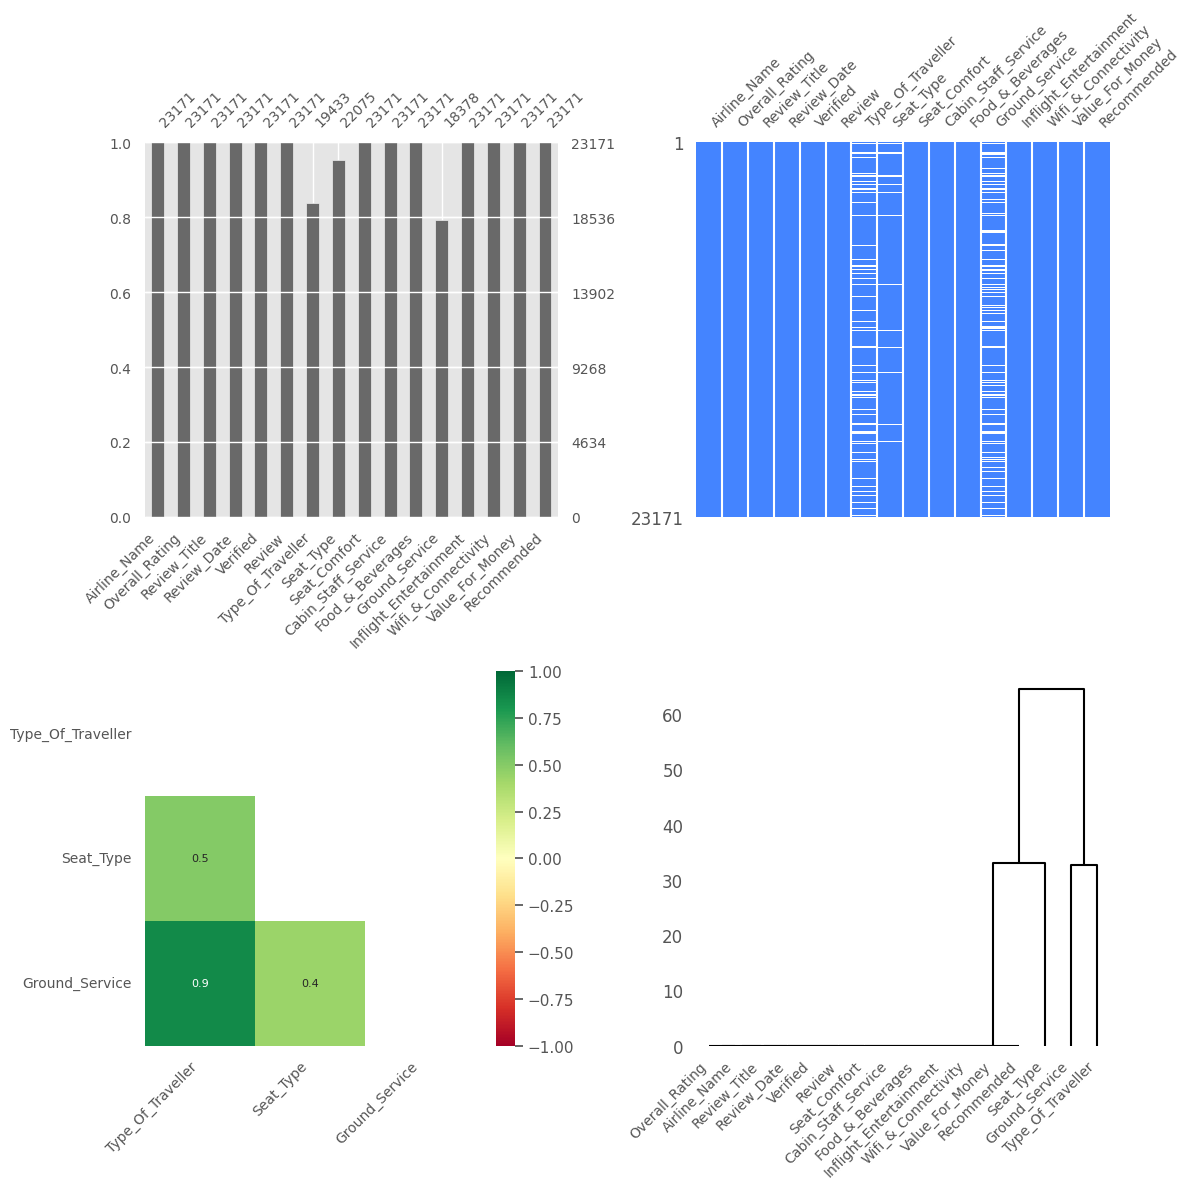

In [69]:
# Missing Data Bar,Matrix,Heatmap,Dendrogram Chart
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(2,2,1)
msno.bar(df,fontsize=10,figsize=(6,6),ax=ax1)
ax2 = fig.add_subplot(2,2,2)
msno.matrix(df,fontsize=10,figsize=(6,6),color=(0.27, 0.52, 1.0),ax=ax2)
ax3 = fig.add_subplot(2,2,3)
msno.heatmap(df,fontsize=10,figsize=(6,6),cmap="RdYlGn",ax=ax3)
ax4 = fig.add_subplot(2,2,4)
msno.dendrogram(df,fontsize=10,figsize=(6,6),orientation="top",ax=ax4)

plt.tight_layout()


Vamos a graficar la distribucion de las variables numéricas

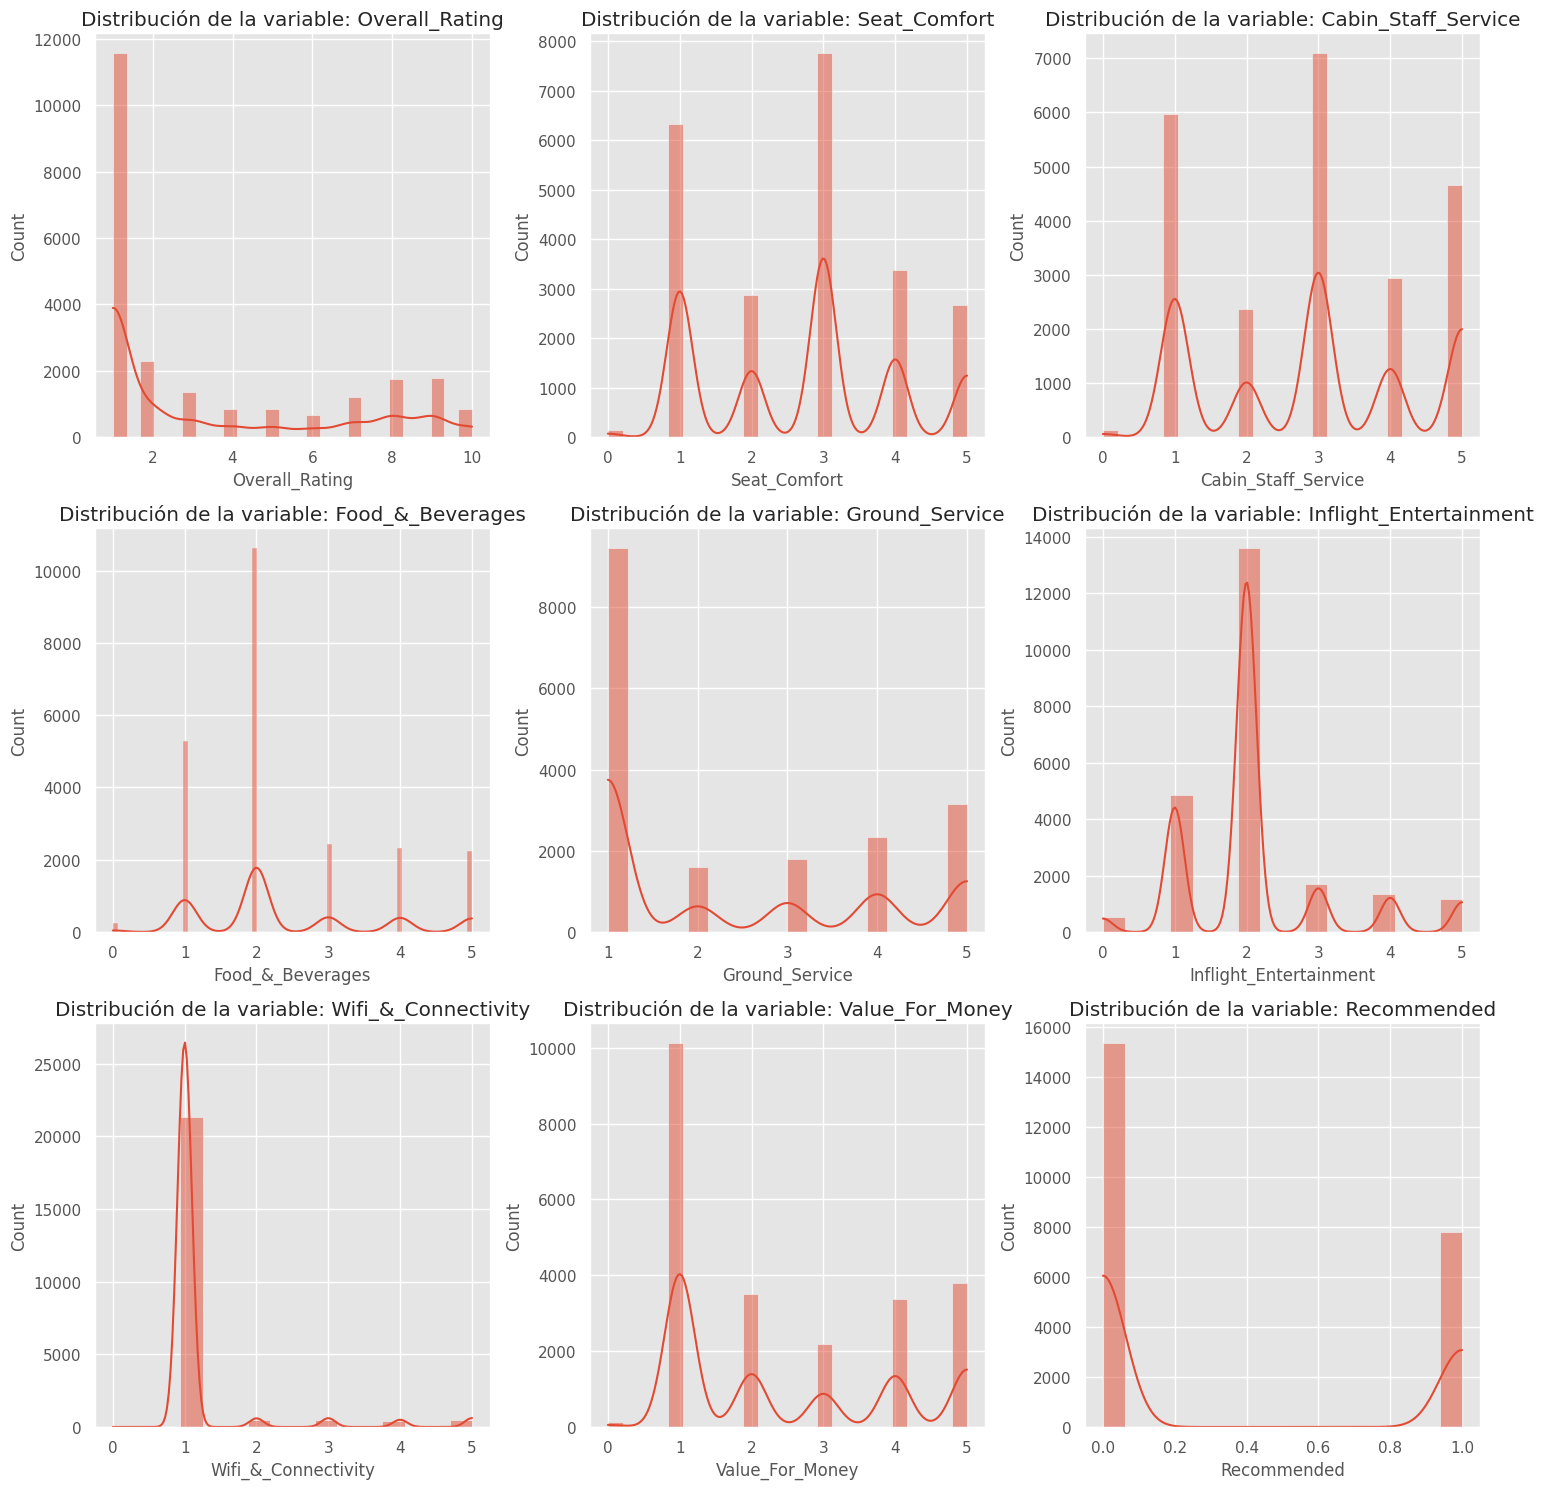

In [70]:
numerical_features = df.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
cols = 3  # para mostrar 3 columnas por fila
rows = (num_plots + cols - 1) // cols  # para alcular el numero de filas

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # ajustar el tamaño

for i, feature in enumerate(numerical_features):
  row_index = i // cols
  col_index = i % cols

  sns.histplot(x=feature, data=df, kde=True, ax=axes[row_index, col_index])
  axes[row_index, col_index].set_title(f"Distribución de la variable: {feature}")

# para remover subplots no utilizados
for i in range(num_plots, rows * cols):
  row_index = i // cols
  col_index = i % cols
  fig.delaxes(axes[row_index, col_index])

plt.tight_layout()  # Ajusta los parametros para mostrarlos mas ajustados
plt.show()

- Se puede ver que la variable del rating general es mas bien negativa, sin embargo, a pesar de que la distribución de la variable Recommended es aproximadamente de 2 a 1,  es mas equilibrada
- Se decide tomar la variable Recommended como Variable objetivo

<ipython-input-71-246a6a4b14a9>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('viridis', n_barras)


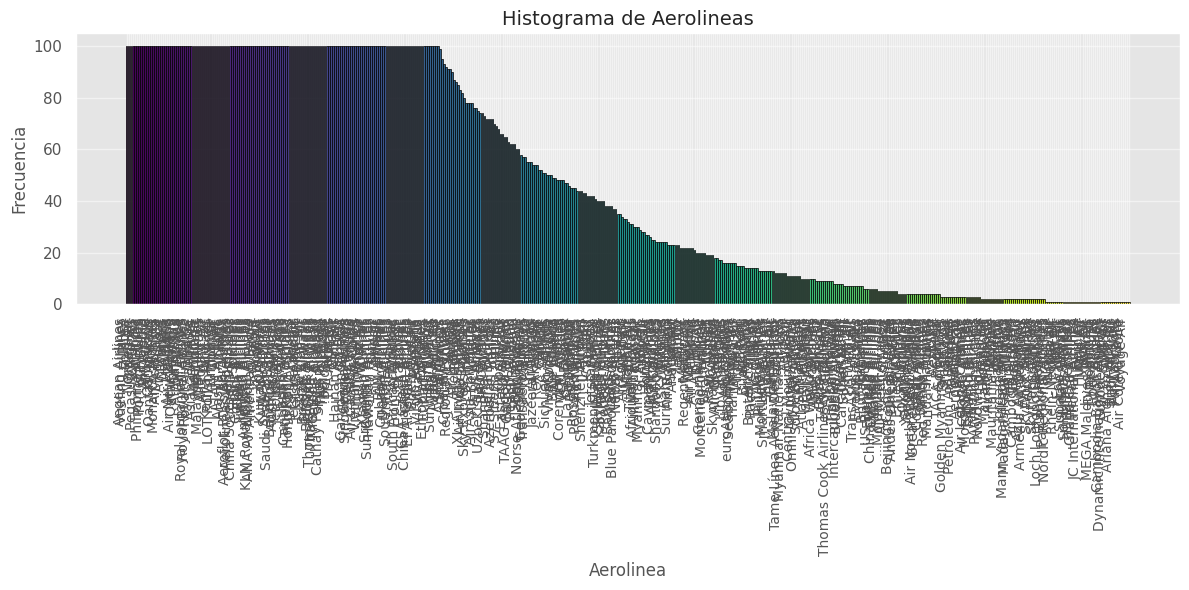

In [71]:
# Hacemos el conteo de 'Airline_Name'
Airline_Name_counts = df['Airline_Name'].value_counts()
Airline_Name = Airline_Name_counts.index

# Creamos los colores para el grafico
n_barras = len(Airline_Name)
colores = plt.cm.get_cmap('viridis', n_barras)

# Preparamos el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(Airline_Name, Airline_Name_counts.values, color=[colores(i) for i in range(n_barras)], edgecolor='black')

plt.xlabel('Aerolinea', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Histograma de Aerolineas', fontsize=14)
plt.grid(True, alpha=0.5)

plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()

plt.show()

- El número de las aerolineas es muy alto por lo que el grafico no es amigable.
- Se hará el mismo análisis con las 20 aerolineas que reciben mas comentarios

<ipython-input-72-d7337a8c7cf9>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('viridis', n_barras)


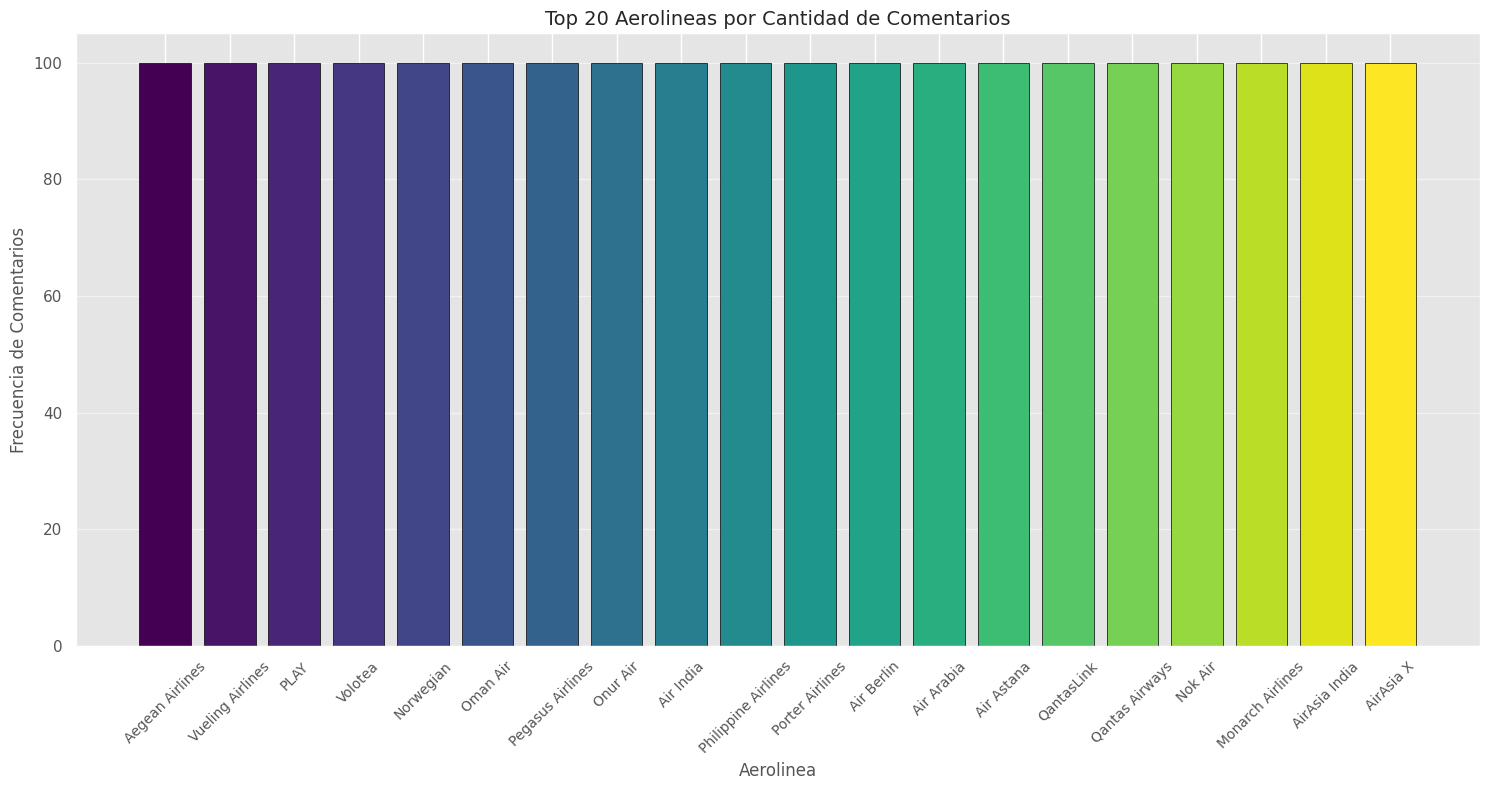

In [72]:
# Top_20 de aerolineas con comentarios

# Conteo de valores únicos para 'Airline_Name'
Airline_Name_counts = df['Airline_Name'].value_counts()

# Filtramos el Top_20
top_20_airlines = Airline_Name_counts.head(20)
top_20_airlines_names = top_20_airlines.index

# Creamos los colores para el grafico del top 20
n_barras = len(top_20_airlines)
colores = plt.cm.get_cmap('viridis', n_barras)

# Preparamos el gráfico de barraspara el top 20
plt.figure(figsize=(15, 8))
plt.bar(top_20_airlines_names, top_20_airlines.values, color=[colores(i) for i in range(n_barras)], edgecolor='black')

plt.xlabel('Aerolinea', fontsize=12)
plt.ylabel('Frecuencia de Comentarios', fontsize=12)
plt.title('Top 20 Aerolineas por Cantidad de Comentarios', fontsize=14)
plt.grid(axis='y', alpha=0.5)

plt.xticks(rotation=45, ha='center', fontsize=10) # Roto las etiquetas por gusto personal
plt.tight_layout()

plt.show()


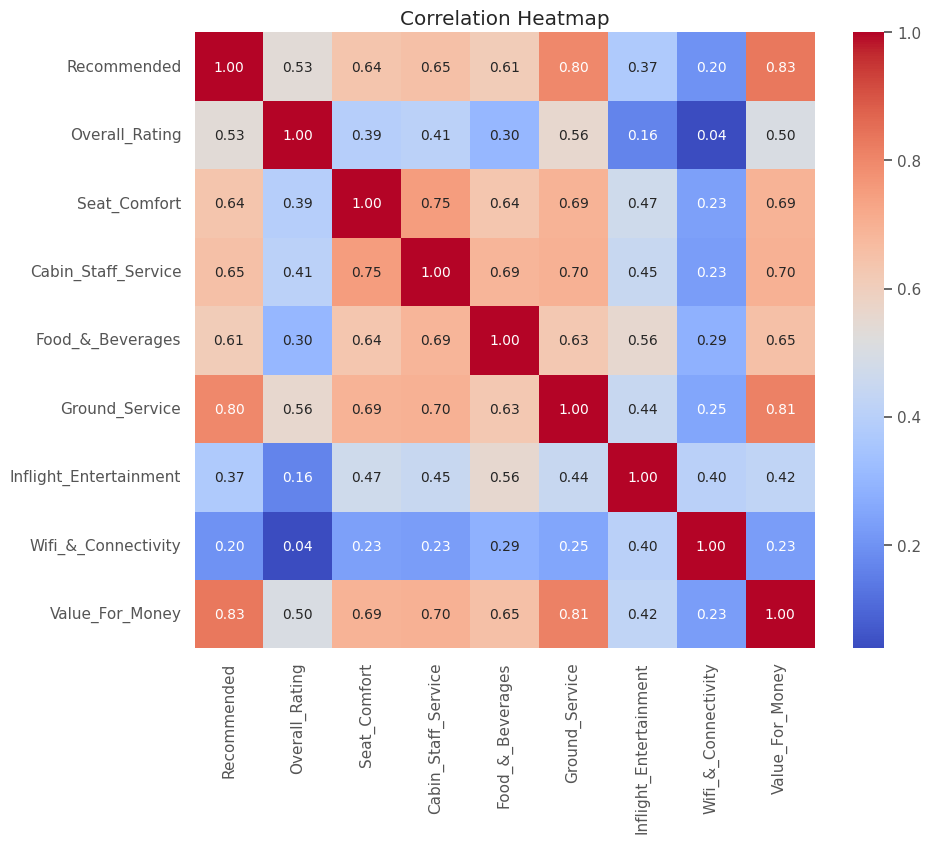

In [73]:
# Mapa de calor de correlaciones incluidos todas las variables numéricas

corr_matrix = df[['Recommended', 'Overall_Rating', 'Seat_Comfort', 'Cabin_Staff_Service', 'Food_&_Beverages', 'Ground_Service', 'Inflight_Entertainment', 'Wifi_&_Connectivity', 'Value_For_Money']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- Conclusiones:
  - Salvo las variables de Entretenimiento y conectividad, todas las demas variables tienen una correlacion superior al 0.50
  - Las variables mas correlacionadas son 'Value_For_Money' y 'Ground_Service', evidenciando que el factor economico de la percepcion de los servicios de la aerolinea y la atencion en tierra son lo mas importante a la hora de recomendar a otros clientes
  - Si bien Overoll_Rating solo tiene una vorrelacion de 0.53 (que no es muy relevante) puede ser que tenga alguna correlación no lineal con el resultado final

# Normalización y limpieza de texto

In [74]:
# Se hace una normalización y limpieza de texto de la variable review

# Sedefine la función de limpieza y normalización
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y puntuación (excepto espacios)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Eliminar espacios en blanco extra
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Aplicar la función de limpieza a la columna 'Review'
df['Cleaned_Review'] = df['Review'].apply(preprocess_text)

# Tokenización
df['review_tokens'] = df['Cleaned_Review'].apply(word_tokenize)

# Eliminar stop words (español e inglés ya que el dataset puede contener ambos)
stop_words_en = set(stopwords.words('english'))
stop_words_es = set(stopwords.words('spanish')) # Si hay reseñas en español
all_stop_words = stop_words_en.union(stop_words_es).union(set(ENGLISH_STOP_WORDS))

df['review_tokens_no_stopwords'] = df['review_tokens'].apply(lambda tokens: [word for word in tokens if word not in all_stop_words])

# Lematización (usando WordNetLemmatizer para inglés)
lemmatizer = WordNetLemmatizer()

df['review_lemmatized'] = df['review_tokens_no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Unir los tokens procesados de nuevo en una cadena
df['review_processed'] = df['review_lemmatized'].apply(lambda tokens: ' '.join(tokens))

# <se imprimen las primeras filas para ver el resultado
print("\nDataset con la columna 'review' procesada:")
print(df[['Review', 'Cleaned_Review', 'review_tokens', 'review_tokens_no_stopwords', 'review_lemmatized', 'review_processed']].head())



Dataset con la columna 'review' procesada:
                                              Review  \
0    Moroni to Moheli. Turned out to be a pretty ...   
1   Moroni to Anjouan. It is a very small airline...   
2    Anjouan to Dzaoudzi. A very small airline an...   
3    Please do a favor yourself and do not fly wi...   
4   Do not book a flight with this airline! My fr...   

                                      Cleaned_Review  \
0  moroni to moheli turned out to be a pretty dec...   
1  moroni to anjouan it is a very small airline m...   
2  anjouan to dzaoudzi a very small airline and t...   
3  please do a favor yourself and do not fly with...   
4  do not book a flight with this airline my frie...   

                                       review_tokens  \
0  [moroni, to, moheli, turned, out, to, be, a, p...   
1  [moroni, to, anjouan, it, is, a, very, small, ...   
2  [anjouan, to, dzaoudzi, a, very, small, airlin...   
3  [please, do, a, favor, yourself, and, do, not,...   
4 

# Análisis de Sentimiento

                                              Review  \
0    Moroni to Moheli. Turned out to be a pretty ...   
1   Moroni to Anjouan. It is a very small airline...   
2    Anjouan to Dzaoudzi. A very small airline an...   
3    Please do a favor yourself and do not fly wi...   
4   Do not book a flight with this airline! My fr...   

                                      Cleaned_Review  sentiment_score  \
0  moroni to moheli turned out to be a pretty dec...           0.6336   
1  moroni to anjouan it is a very small airline m...          -0.0258   
2  anjouan to dzaoudzi a very small airline and t...           0.8122   
3  please do a favor yourself and do not fly with...          -0.9589   
4  do not book a flight with this airline my frie...           0.4767   

  sentiment_category  
0           Positive  
1           Negative  
2           Positive  
3           Negative  
4           Positive  

Distribución de las Categorias de Sentimiento:
sentiment_category
Positive    12661
N

<ipython-input-75-49a11adbd87c>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment_category', data=df, order=sentiment_counts.index, palette='viridis')


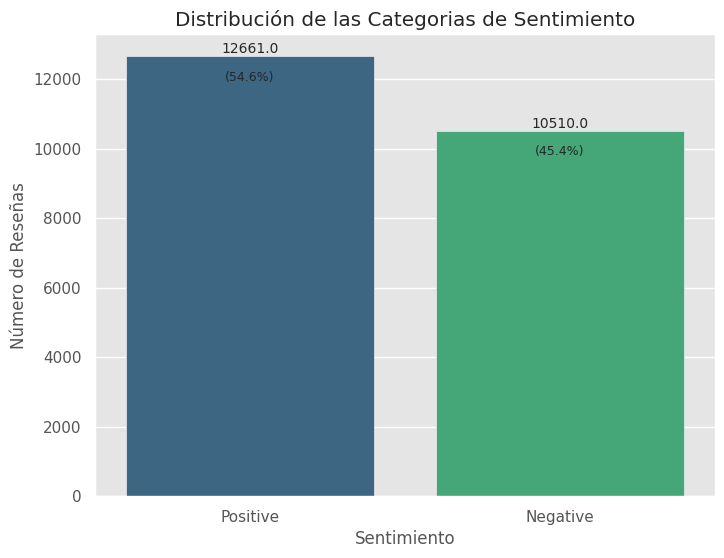

In [75]:
# Inicializamos VADER para analizar intensidad de sentimientos
analyzer = SentimentIntensityAnalyzer()

# Definimos la función para conseguir la calificación de sentimiento (sentiment score)
def get_sentiment_score(text):
    if pd.isna(text):
        return None
    score = analyzer.polarity_scores(text)
    return score['compound']

# Aplicamos el naálisis a la columna'review_processed'
df['sentiment_score'] = df['review_processed'].apply(get_sentiment_score)

# Defino la funcion para categorizar el sentimiento basado en el score
def categorize_sentiment(score):
    if score is None:
        return None
    if score >= 0:
        return 'Positive'
    else:
        return 'Negative'

# Aplico la categorización
df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Imprimo los resultados
print(df[['Review', 'Cleaned_Review', 'sentiment_score', 'sentiment_category']].head())

# Analizo la distribución de las distintas Categorias de sentimiento
sentiment_counts = df['sentiment_category'].value_counts()
print("\nDistribución de las Categorias de Sentimiento:")
print(sentiment_counts)

# Calculo los porcentajes para el grafico
sentiment_percentages = df['sentiment_category'].value_counts(normalize=True) * 100
print("\nDistribución en Porcentajes de Sentiment Categories:")
print(sentiment_percentages)

# Grafico la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sentiment_category', data=df, order=sentiment_counts.index, palette='viridis')
plt.title('Distribución de las Categorias de Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Reseñas')

# Agrego los valores y porcentajes al grafico de barras
xtick_labels = [label.get_text() for label in ax.get_xticklabels()]

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    category = xtick_labels[i] # Use the index 'i' to get the corresponding category from the ordered list of labels
    percentage = sentiment_percentages[category]
    ax.annotate(f'({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, -15), textcoords='offset points', fontsize=9)

plt.show()


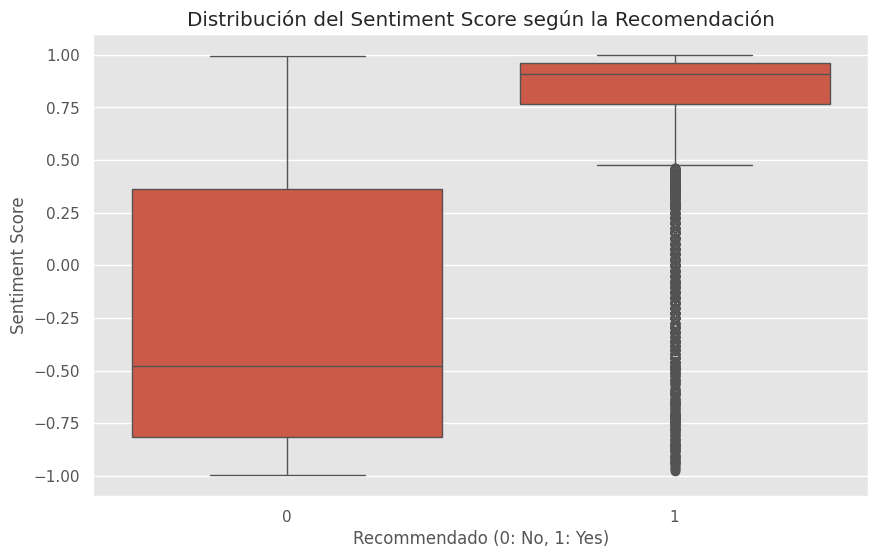

In [76]:
# Se analizan las calificaciones de sentimiento contra la recomendación
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recommended', y='sentiment_score', data=df)
plt.title('Distribución del Sentiment Score según la Recomendación')
plt.xlabel('Recommendado (0: No, 1: Yes)')
plt.ylabel('Sentiment Score')
plt.show()

# Word Clouds para las reseñas

- Vamos a comparar las palabras mas relevantes para las reseñas Positivas y Negativas

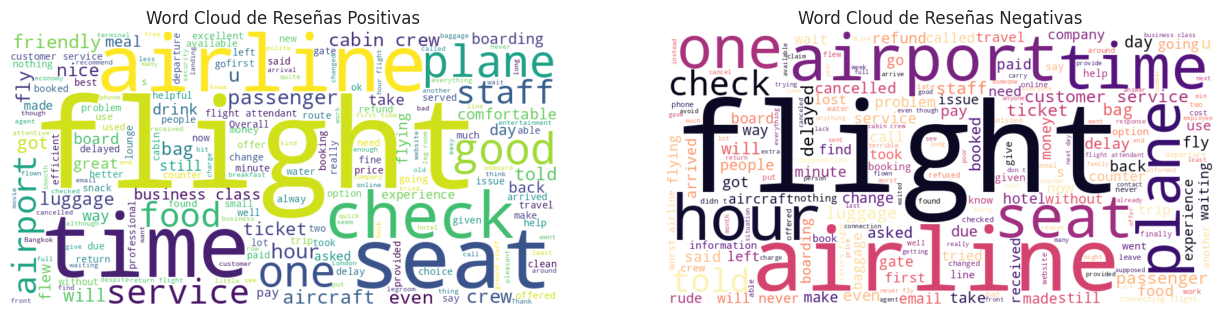

In [77]:
# Separo las reseñas positivas y negativas
positive_reviews = df[df['sentiment_category'] == 'Positive']['Review'].str.cat(sep=' ')
negative_reviews = df[df['sentiment_category'] == 'Negative']['Review'].str.cat(sep=' ')

# Se crean las word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(negative_reviews)

# Mostramos los gráficos de Word clouds
plt.figure(figsize=(24, 12))

plt.subplot(1,3,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reseñas Positivas', fontsize=12)

plt.subplot(1,3,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reseñas Negativas', fontsize=12)

plt.show()

#  Vamos a ver cuales son las 10 palabras mas comunes de las reseñas

<ipython-input-78-1fa049e679ac>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=words, y=counts, palette='viridis')


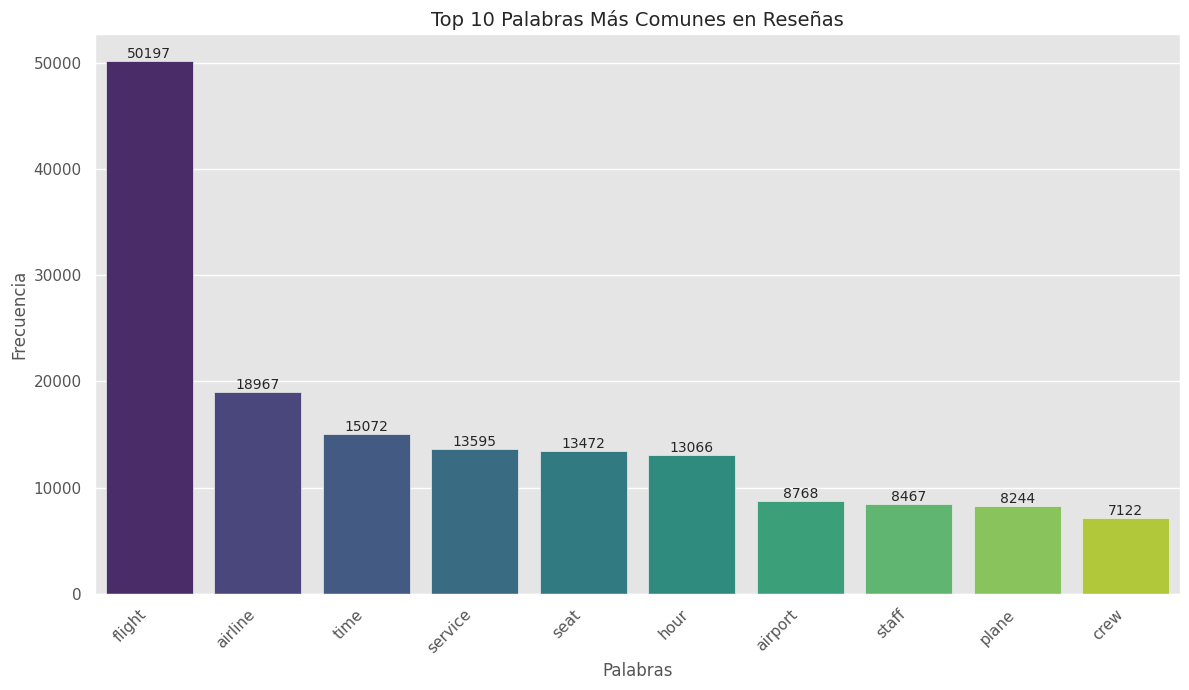

In [78]:
# Definimos todas las palabras procesadas de Reviews
all_words = ' '.join(df['review_processed']).split()

# Hacemos el conteo de las palabras
word_counts = Counter(all_words)

# Top-10 de palabras
top_10_words = word_counts.most_common(10)

# Separamos las palabras del conteo para el gráfico
words = [word for word, count in top_10_words]
counts = [count for word, count in top_10_words]

# Creamos el gráfico de barras
plt.figure(figsize=(12, 7))
bars = sns.barplot(x=words, y=counts, palette='viridis')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 Palabras Más Comunes en Reseñas', fontsize=14)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center') # Nota: va: vertical alignment, ha: horizontal alignment

plt.xticks(rotation=45, ha='right') # Rotamos a 45 las etiquetas
plt.tight_layout()
plt.show()

# **Feature selection**

Usaremos las revisiones procesadas como X y la variable objetivo será el sentimiento.
Se necesitara realizar una trnasformación de esos valores a numéricos.

In [79]:
# Vectorización TF-IDF solo para 10.000 valores
tfidf = TfidfVectorizer(max_features=10000)
# tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['review_processed']).toarray()

# transformación de la variable objetivo
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment_category'])

# Separación de datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **El modelo**
Se decide construir un modelo de una red neuronal simple usando Keras

In [81]:
# Construyo un modelo básico de una Red Neuronal de 2 capas con Keras

# Convertir y a one-hot
num_classes = len(label_encoder.classes_) #defino el número de clases por si quiero usarlo en otro dataset diferente

y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Entrenamiento del modelo
history = model.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

# Evaluación

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Agregados para las etiquetas
target_names_list = label_encoder.classes_
actual_labels = label_encoder.transform(target_names_list)

print('Matriz de Confusión')
print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes, target_names=['Negativo', 'Positivo']))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,194 (2.44 MB)

 Trainable params: 640,194 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7643 - loss: 0.4958 - val_accuracy: 0.8770 - val_loss: 0.2825
Epoch 2/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9359 - loss: 0.1857 - val_accuracy: 0.8816 - val_loss: 0.2648
Epoch 3/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9676 - loss: 0.1073 - val_accuracy: 0.8773 - val_loss: 0.2854
Epoch 4/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9846 - loss: 0.0664 - val_accuracy: 0.8776 - val_loss: 0.3170
Epoch 5/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9925 - loss: 0.0405 - val_accuracy: 0.8754 - val_loss: 0.3574
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Matriz de Confusión
[[1773  329]
 [ 298 2235]]
              precision    recall  f1-score   support

    Negativo       0.86      0.84      0.85      2102
    Positivo       0.87      0.88      0.88      2533

    accuracy                           0.86      4635
   macro avg       0.86      0.86      0.86      4

El resultado da un accuracy de 0.86 y vemos que es mejor prediciendo los positivos (0.87) que los negativos, (0.86)

# **Mejora del Modelo**
Se agregan capas y se mejoran los hiperparametros

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 256)            │     2,560,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,538 (9.92 MB)

 Trainable params: 2,601,538 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 32s 63ms/step - accuracy: 0.7782 - loss: 0.8017 - val_accuracy: 0.8390 - val_loss: 0.8468
Epoch 2/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.8418 - loss: 0.8570 - val_accuracy: 0.8328 - val_loss: 0.8498
Epoch 3/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.8462 - loss: 0.8272 - val_accuracy: 0.8530 - val_loss: 0.7888
Epoch 4/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.8585 - loss: 0.7904 - val_accuracy: 0.8557 - val_loss: 0.7577
Epoch 5/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.8562 - loss: 0.7797 - val_accuracy: 0.8646 - val_loss: 0.7526
Epoch 6/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.8594 - loss: 0.7648 - val_accuracy: 0.8495 - val_loss: 0.7812
Epoch 7/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.8536 - loss: 0.7724 - val_accuracy: 0.8565 - val_loss: 0.7203
Epoch 8/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.8621 - loss: 0

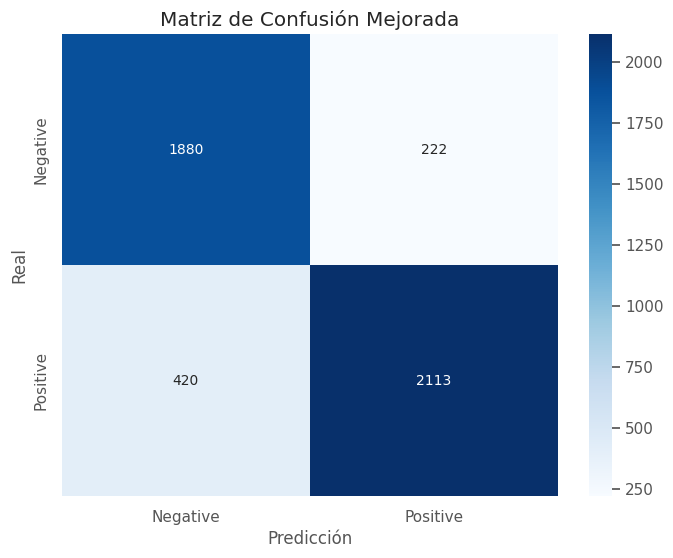

Classification Report Mejorado
              precision    recall  f1-score   support

    Negativo       0.82      0.89      0.85      2102
    Positivo       0.90      0.83      0.87      2533

    accuracy                           0.86      4635
   macro avg       0.86      0.86      0.86      4635
weighted avg       0.87      0.86      0.86      4635



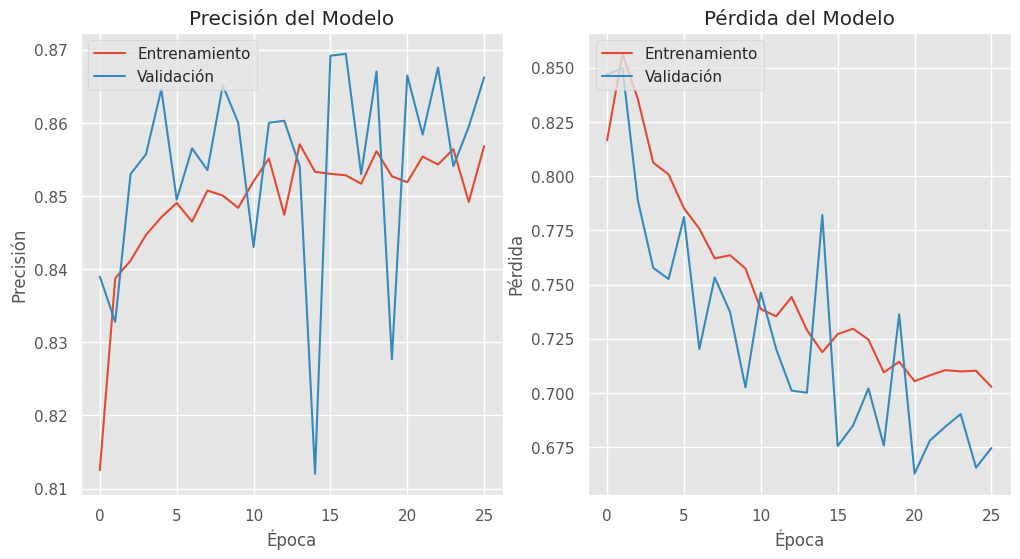

In [87]:
# Mejorando el modelo agregando más capas y Dropout
model_improved = Sequential()
model_improved.add(Dense(256, input_dim=X.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model_improved.add(Dropout(0.5))# Agregamos una capa de Dropout para regularización
model_improved.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001))) # Aumentar el número de neuronas en la segunda capa y añadir regularización L2
model_improved.add(Dropout(0.4)) # Ajustar la tasa de dropout
model_improved.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001))) # Añadir una nueva capa con un número diferente de neuronas
model_improved.add(Dropout(0.3))
# Capa de salida
model_improved.add(Dense(num_classes, activation='softmax'))

# Compilando el modelo con un learning rate ajustado para el optimizador Adam

optimizer = Adam(learning_rate=0.005) # Ejemplo de ajuste del learning rate

model_improved.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_improved.summary()

# Entrenamiento del modelo mejorado con más épocas y batch size ajustado
# También se puede añadir EarlyStopping para evitar overfitting

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Aumento la paciencia

history_improved = model_improved.fit(X_train, y_train_cat,
                                      epochs=100, # Aumento las épocas máximas permitidas por Early Stopping
                                      batch_size=32, # Experimento con el batch size
                                      validation_split=0.2,
                                      callbacks=[early_stopping])

# Evaluación del modelo mejorado
y_pred_improved = model_improved.predict(X_test)
y_pred_classes_improved = np.argmax(y_pred_improved, axis=1)

# Graficar la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_classes_improved)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_list, yticklabels=target_names_list)
plt.title('Matriz de Confusión Mejorada')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Imprimir el Classification Report
print('Classification Report Mejorado')
print(classification_report(y_test, y_pred_classes_improved, target_names=['Negativo', 'Positivo']))

# Visualizar el historial de entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'])
plt.plot(history_improved.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'])
plt.plot(history_improved.history['val_loss'])
plt.title('Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()


# ### Conclusión General

- El análisis de las reseñas de aerolíneas ha proporcionado insights valiosos tanto para las aerolíneas como para los viajeros.
- Se identificó que la percepción del **"Valor por Dinero"** y la calidad del **"Servicio en Tierra"** son los factores más fuertemente correlacionados con la recomendación de una aerolínea por parte de los clientes. Esto sugiere que, si bien la experiencia a bordo es importante, los aspectos económicos y el servicio antes y después del vuelo son cruciales para la satisfacción general y la lealtad del cliente.

- El análisis de sentimiento, utilizando VADER, confirmó que el tono emocional de la reseña escrita está fuertemente ligado a si un cliente recomienda o no la aerolínea. Las reseñas positivas se asocian abrumadoramente con la recomendación, mientras que las negativas con la no recomendación.
-Los Word Clouds destacaron visualmente los temas y palabras clave asociados a cada categoría de sentimiento, ofreciendo una comprensión rápida de los aspectos que generan mayor satisfacción o insatisfacción (ej. "seat", "service", "flight", "time" son palabras frecuentes en general, mientras que el contexto en el que aparecen es clave para el sentimiento).

- Se desarrolló un modelo de red neuronal para clasificar el sentimiento de las reseñas. La versión mejorada del modelo, incorporando capas adicionales, regularización (L2 y Dropout) y Early Stopping, mostró un rendimiento prometedor.
-Las métricas del `classification_report` (Precision, Recall, F1-score) y la `confusion_matrix` detallan la capacidad del modelo para identificar correctamente las reseñas Negativas, Neutras y Positivas. Un buen rendimiento en estas métricas indica que el modelo puede ser una herramienta útil para automatizar la categorización de reseñas por sentimiento, permitiendo a las aerolíneas procesar grandes volúmenes de feedback de manera eficiente.
- Al analizar los resultados del modelo normal y el modelo mejorado, observamos que el accuracy, la precisión, el recall y el F1-score para las categorías 'Negativo' y 'Positivo' no experimentaron un cambio significativo. Ambos modelos demostraron una buena capacidad para clasificar las reseñas, con métricas en un rango similar.

- Sin embargo, la gráfica de rendimiento del modelo mejorado (mostrando la precisión y la pérdida durante las épocas de entrenamiento y validación) sugiere que la adición de capas, regularización (L2 y Dropout) y Early Stopping contribuyó a un entrenamiento más estable y a una menor probabilidad de overfitting en comparación con el modelo básico.

- Aunque las métricas finales en el conjunto de prueba son similares, el modelo mejorado es conceptualmente más robusto y podría generalizar mejor a nuevos datos si se entrenara por más tiempo o con un conjunto de datos más grande, ya que el Early Stopping ayudó a encontrar el punto óptimo de detención. La convergencia en la pérdida de validación en el modelo mejorado parece más suave.

El modelo de clasificación de sentimiento abre la puerta a un monitoreo continuo y proactivo de la opinión del cliente.

# **Posibilidades de mejoras**

# Limitaciones del Análisis:

Es importante considerar las limitaciones del modelo utilizado para el análisis y algunas cosas que se podrían hacer diferente:

- El desbalance en la variable `Recommended` y posiblemente en las categorías de sentimiento, si bien es leve, puede afectar el rendimiento del modelo sin técnicas para manejarlo (como oversampling o undersampling).
- La elección de imputación de valores faltantes con la mediana es una estrategia simple; otras técnicas podrían ser más adecuadas.
- El preprocesamiento de texto (especialmente stemming) puede perder matices. La lematización podría ser una alternativa.
- El modelo de red neuronal es muy básico. Modelos más complejos o técnicas de machine learning más avanzadas (como Random Forest, SVM, o modelos basados en Transformers para texto) podrían ofrecer un mejor rendimiento en la clasificación de sentimiento.
- El análisis se centra en el sentimiento general; un análisis más detallado podría intentar identificar el sentimiento *sobre aspectos específicos* (ej. sentimiento sobre la comida, sentimiento sobre el servicio).